<a href="https://colab.research.google.com/github/GeneralHassaan/Project_2/blob/main/part_4_proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Project_2
# Hassaan Asif

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

This data set is solely focused on the income of adults based on multiple factors and how those factors affect their incomes.

In [3]:
# source https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

filename = '/content/adult.csv'

df = pd.read_csv(filename)

df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB



This is a **classification model**. The model consists of **13** features all together. The database has about 48,842 rows of data. The biggest challenge that I do see is building a connection with the other columns as each individual column seems to be unique.

In [5]:
# dropping unnecessary columns

df.drop(columns=['workclass' , 'education' , 'marital-status' , 'occupation' 
                 , 'relationship' , 'native-country'], inplace = True)

I choose to drop these columns because regardless of these factors there were some people who were making more then 50k while some were not. Also I wanted to drop categorical features from the model for better precision.

In [6]:
# dropping unnecessary rows
df.isna().sum().sum
df.duplicated().sum()

389

In [7]:
df.drop_duplicates(inplace = True)

VISUALIZATIONS

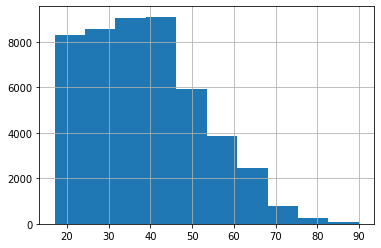

In [8]:
df['age'].hist()

from the histogram, we see most of our audience for this particular dataset is within their late 30s to mid 40s.

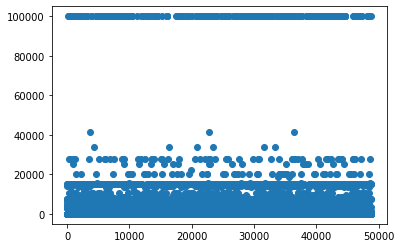

In [9]:
plt.scatter(df.index, df['capital-gain'])

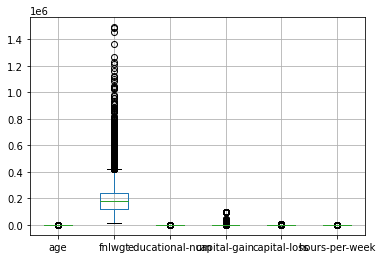

In [10]:
df.boxplot()

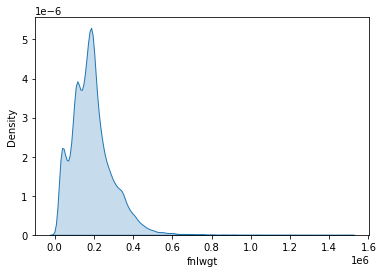

In [11]:
sns.kdeplot(df['fnlwgt'] , shade = True)

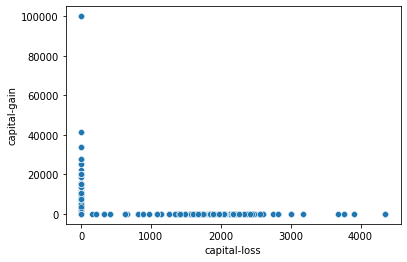

In [12]:
sns.scatterplot(data = df, x='capital-loss' , y = 'capital-gain')

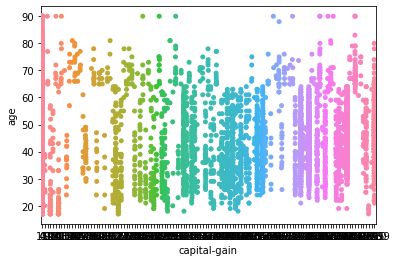

In [13]:
sns.stripplot(x = df['capital-gain'] , y = df['age'])

This graph tells us that older people or retired people have much higher capital gains compared to the younger generation.

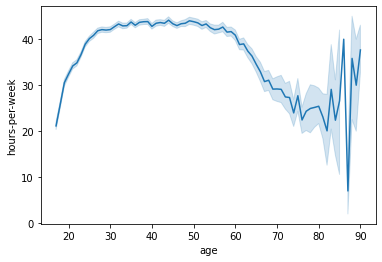

In [14]:
sns.lineplot(data = df , x='age' , y = 'hours-per-week')

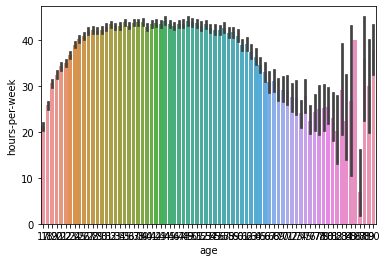

In [15]:
sns.barplot(data = df, x = 'age' , y = 'hours-per-week' )

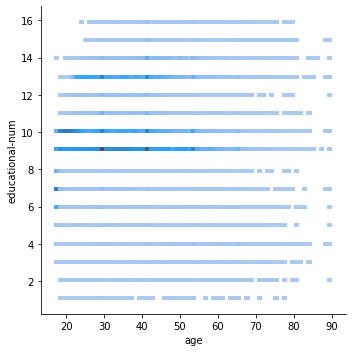

In [16]:
sns.displot(data = df, x='age' , y='educational-num' )

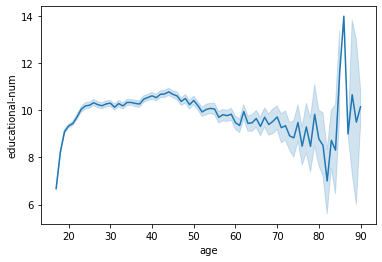

In [17]:
sns.lineplot(data = df, x='age' , y='educational-num')

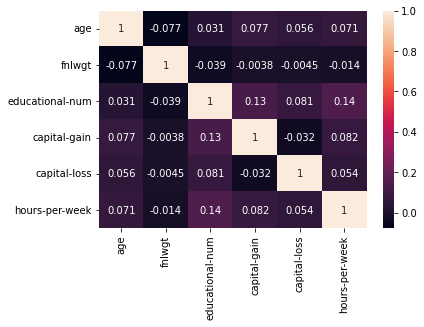

In [18]:

sns.heatmap(df.corr() , annot=True)

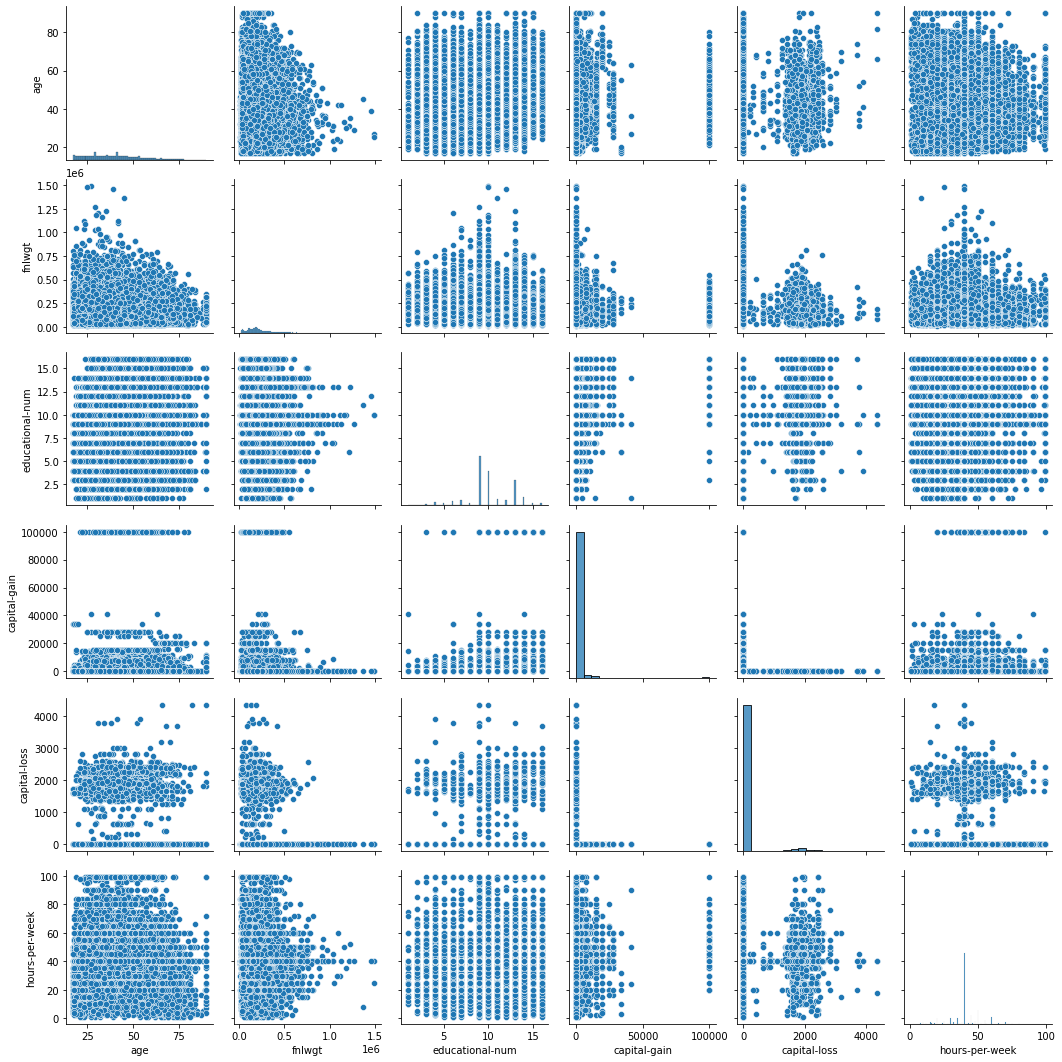

In [19]:
sns.pairplot(df)

In [20]:
# splitting data into X & Y

X = df.drop(columns = 'income')

y = (df['income'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,race,gender
19162,White,Female
22951,White,Male
24424,White,Male
32454,White,Male
20416,Black,Female
...,...,...
11305,White,Male
45063,White,Male
38399,White,Male
860,Black,Female


In [22]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [23]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

In [24]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

In [25]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2636cfc6d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2636cfccd0>

In [26]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [27]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
dec_tree.predict(X_test_processed)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [29]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.8020033572745535
0.8040283968961532


In [30]:
# scaling data
scaled_df = scaler.fit_transform(X_train_processed)

In [31]:
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
 
pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [32]:
scores = {}

for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      model = DecisionTreeClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      model.fit(X_train_processed, y_train)
      score = model.score(X_test_processed, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100
 
#Display dictionary of scores
scores

{'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 80.4028,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 80.4028,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 80.4028,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 80.4028,
 'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 80.4028,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 80.4028,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 80.4028,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 80.4028,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 80.4028,
 'depth 2, min_samples_leaf 3, min_samples_split 2 accuracy': 80.4028,
 'depth 2, min_samples_leaf 3, min_samples_split 10 accuracy': 80.4028,
 'depth 2, min_samples_leaf 3, min_samples_split 100 accuracy': 80.4028,
 'depth 2, min_samples_leaf 15, min_samples_split 2 accuracy': 80.4028,
 'depth 2, min_samples_leaf 15, min_samples_split 10 accur

In [33]:
dt_grid_search = GridSearchCV(model, param_grid)

In [34]:
dt_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=20,
                                              min_samples_split=100),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [35]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

In [36]:
dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train_processed, y_train)
dt_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [37]:
best_model = dt_grid_search2.best_estimator_
# 
best_model.fit(X_train_processed, y_train)
#
best_model.score(X_test_processed, y_test)

0.8433217764569919

In [38]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()

dt_grid_search = GridSearchCV(model, param_grid)

In [39]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [40]:
knn_pipe_gs = GridSearchCV(knn_pipe , param_grid)
 
knn_pipe_gs.fit(X_train_processed, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8164933135215453


**81%** of the data is accurate. 

In [41]:
# Classification Report
knn =  KNeighborsClassifier(n_neighbors=1)

knn_pipe = make_pipeline(scaler, knn)

knn_pipe.fit(X_train_processed, y_train)

y_pred = knn_pipe.predict(X_test_processed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85      9253
        >50K       0.52      0.53      0.52      2861

    accuracy                           0.77     12114
   macro avg       0.69      0.69      0.69     12114
weighted avg       0.77      0.77      0.77     12114



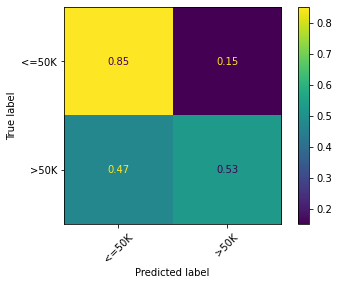

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true',
xticks_rotation=45)

The best model would be the decision Tree. As looking through from above, we can tell that both the models are giving us 81% accuracy, the decision tree does it faster compared to the grid search. In a real world example, this model would help us predict what factors play a vital role for someone to be earning more. It would help us distinguish what the difference is in between someone who's making < 50k vs someone whom isn't and people could use that data to utilize what skills one needs in order to be making greater amount of $money.